<a href="https://colab.research.google.com/github/codefinn9988/Ml_learn/blob/main/learn_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  908  901  910  958  921  842  791  799  779  754
gene2  337  372  340  365  381  646  601  659  627  655
gene3  501  523  492  473  496   29   22   35   11   32
gene4  490  451  501  535  491  570  601  580  589  601
gene5  256  262  271  283  309  520  473  483  496  538
(100, 10)


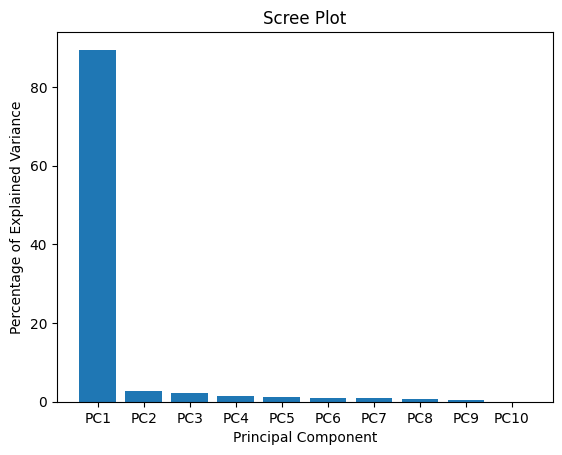

In [ ]:
#Learn PCA
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

genes = ['gene' + str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
  data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
  data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)

print(data.head())
print(data.shape)
# Perform PCA on the data

# First center and scale the data
scaled_data = preprocessing.scale(data.T) # mean = 0 , sd = 1

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data


#The following code constructs the Screen plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


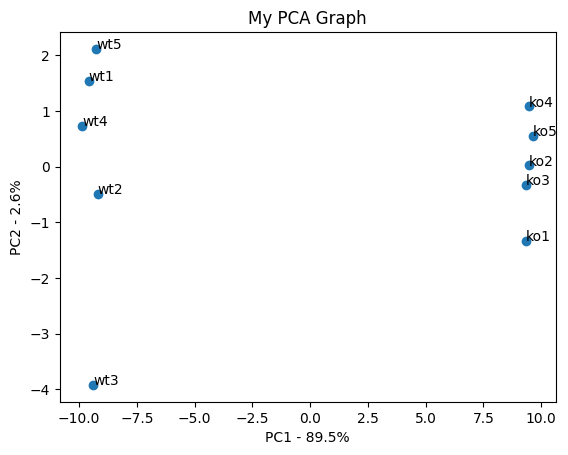

In [ ]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [ ]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene53    0.105668
gene19    0.105665
gene31   -0.105622
gene86    0.105602
gene35    0.105582
gene95   -0.105576
gene58    0.105572
gene41   -0.105555
gene50   -0.105546
gene16   -0.105537
dtype: float64
